In [114]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.color import label2rgb
import scipy 


### 1KB ladder

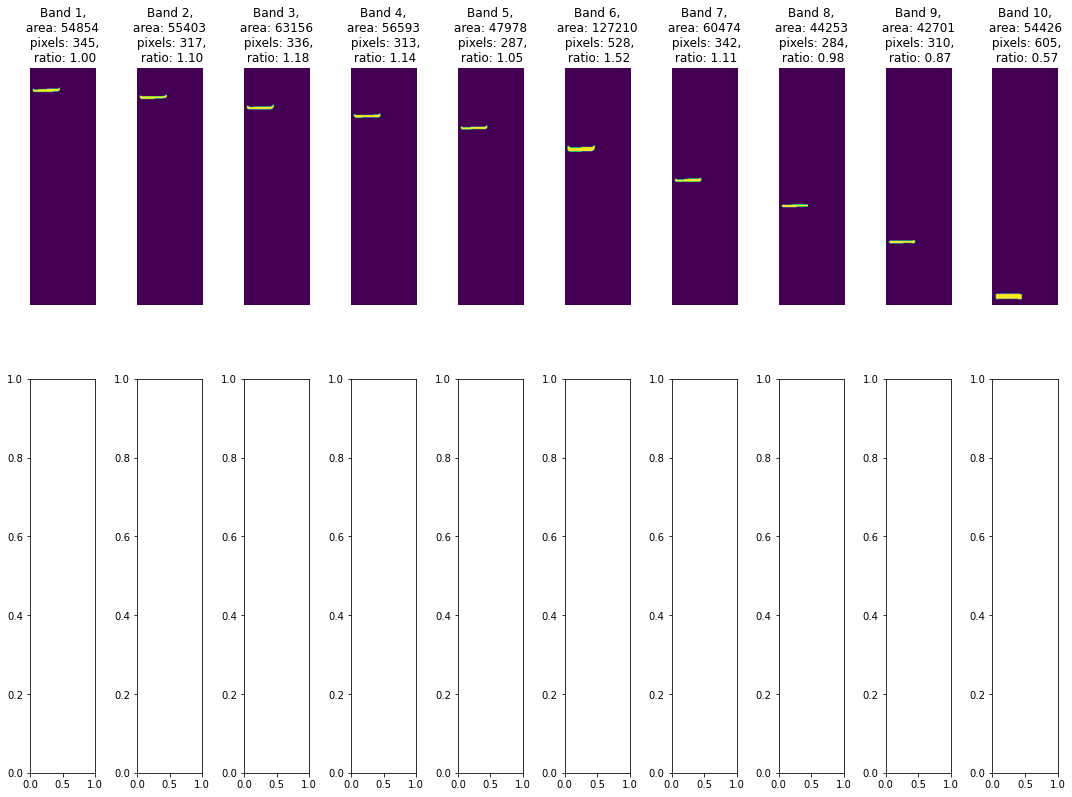

In [115]:

image_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Images/1kb_DNAladder.png'
mask_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Masks/1kb_DNAladder.tif'

im = np.array(Image.open(image_file).convert('L'))
mask = np.array(Image.open(mask_file))

labelled_bands, _ = ndi.label(mask)

fig,ax = plt.subplots(2,10,figsize=(15,12))

ref_val = 0
combined_all = []
pixel_all = []
real = [42, 42, 50, 42, 33, 125, 48, 36, 42, 42]
for sel_val in np.unique(labelled_bands):
    if sel_val == 0:
        continue
        
    pixel_intensities = np.sum(im[labelled_bands==sel_val])
    pixel_count =  len(im[labelled_bands==sel_val])
    combined = pixel_intensities / pixel_count  
    combined_all.append(combined)
    pixel_all.append(pixel_intensities)
    if sel_val == 1:
        ref_val = combined
        
    id_text = 'Band %s,\n area: %s \n pixels: %s,\n ratio: %.2f' % (sel_val, pixel_intensities, pixel_count, combined/ref_val) 
    
    new_im = np.zeros((mask.shape))
    new_im[labelled_bands==sel_val] = sel_val
    
    if sel_val > 10:
        col = 1
        sel_val -= 11
    else:
        sel_val -= 1
        col = 0

    ax[col,sel_val].imshow(new_im)
    ax[col,sel_val].axis('off')
    ax[col,sel_val].set_title(id_text)
    
plt.tight_layout()

pos = pixel_all[0]
norm_pixel = [x/pos for x in pixel_all]

pos = combined_all[0]
norm_combined = [x/pos for x in combined_all]

pos = real[0]
norm_real = [x/pos for x in real]    

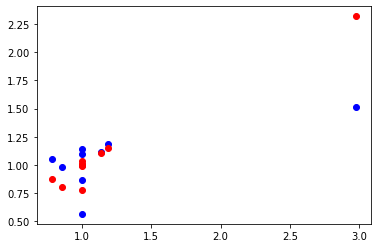

In [103]:
plt.scatter(norm_real, norm_combined, color='b')
plt.scatter(norm_real, norm_pixel, color='r')

Pixel R2: 0.969
Com R2: 0.484


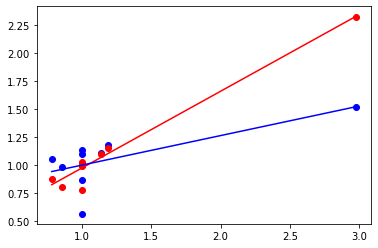

In [116]:

error_com = [np.abs(y-x) for x,y in zip(norm_real, norm_combined)]
error_pixel = [np.abs(y-x) for x,y in zip(norm_real, norm_pixel)]

plt.scatter(norm_real, norm_combined, color='b')
plt.scatter(norm_real, norm_pixel, color='r')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_pixel)
print('Pixel R2: %.3f' % r_value**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_combined)
print('Com R2: %.3f' % r_value**2)


plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_pixel, 1))(np.unique(norm_real)),color='r')
plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_combined, 1))(np.unique(norm_real)), color='b')


In [ ]:
error_com = [np.abs(y-x) for x,y in zip(norm_real, norm_combined)]
error_pixel = [np.abs(y-x) for x,y in zip(norm_real, norm_pixel)]
plt.scatter(norm_real, error_com, color='b')
plt.scatter(norm_real, error_pixel, color='r')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, error_pixel)
print('Pixel R2: %.3f' % r_value**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, error_com)
print('Com R2: %.3f' % r_value**2)


plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, error_pixel, 1))(np.unique(norm_real)),color='r')
plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, error_com, 1))(np.unique(norm_real)), color='b')


### Low MW Ladder

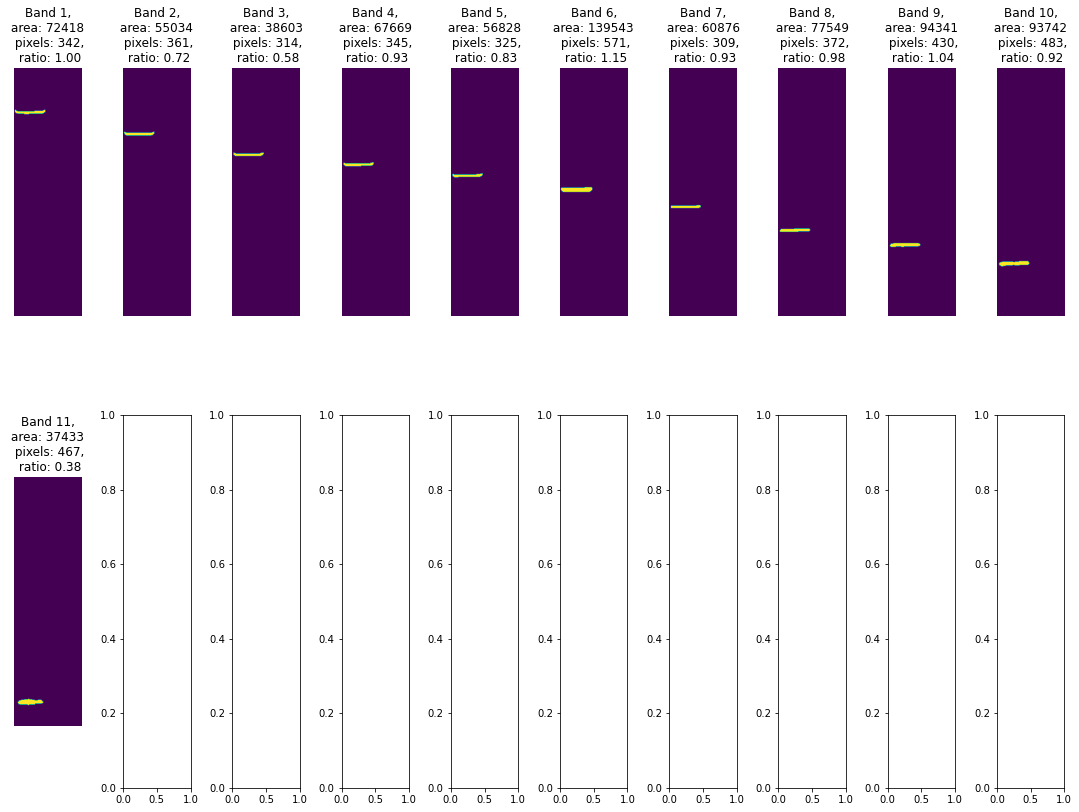

In [108]:
image_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Images/LowMolecWeight_DNAladder.png'
mask_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Masks/LowMolecWeight_DNAladder.tif'

im = np.array(Image.open(image_file).convert('L'))
mask = np.array(Image.open(mask_file))
labelled_bands, _ = ndi.label(mask)

fig,ax = plt.subplots(2,10,figsize=(15,12))

ref_val = 0
combined_all = []
pixel_all = []
real = [42, 27, 20, 33, 27, 110, 33, 43, 58, 63, 43]

for sel_val in np.unique(labelled_bands):
    if sel_val == 0:
        continue
        
    pixel_intensities = np.sum(im[labelled_bands==sel_val])
    pixel_count =  len(im[labelled_bands==sel_val])
    combined = pixel_intensities / pixel_count  
    combined_all.append(combined)
    pixel_all.append(pixel_intensities)
    if sel_val == 1:
        ref_val = combined
        
    id_text = 'Band %s,\n area: %s \n pixels: %s,\n ratio: %.2f' % (sel_val, pixel_intensities, pixel_count, combined/ref_val) 
    
    new_im = np.zeros((mask.shape))
    new_im[labelled_bands==sel_val] = sel_val
    
    if sel_val > 10:
        col = 1
        sel_val -= 11
    else:
        sel_val -= 1
        col = 0

    ax[col,sel_val].imshow(new_im)
    ax[col,sel_val].axis('off')
    ax[col,sel_val].set_title(id_text)
    
plt.tight_layout()


pos = pixel_all[0]
norm_pixel = [x/pos for x in pixel_all]

pos = combined_all[0]
norm_combined = [x/pos for x in combined_all]

pos = real[0]
norm_real = [x/pos for x in real]

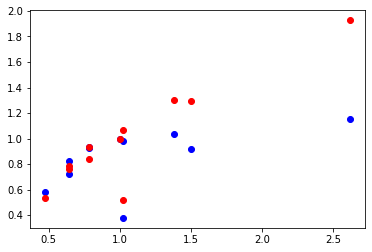

In [110]:
plt.scatter(norm_real, norm_combined, color='b')
plt.scatter(norm_real, norm_pixel, color='r')

Pixel R2: 0.842
Com R2: 0.312


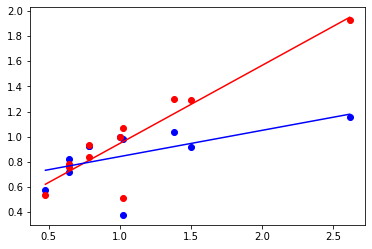

In [113]:
error_com = [np.abs(y-x) for x,y in zip(norm_real, norm_combined)]
error_pixel = [np.abs(y-x) for x,y in zip(norm_real, norm_pixel)]

plt.scatter(norm_real, norm_combined, color='b')
plt.scatter(norm_real, norm_pixel, color='r')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_pixel)
print('Pixel R2: %.3f' % r_value**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_combined)
print('Com R2: %.3f' % r_value**2)


plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_pixel, 1))(np.unique(norm_real)),color='r')
plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_combined, 1))(np.unique(norm_real)), color='b')
pass

### 50BP DNA Ladder

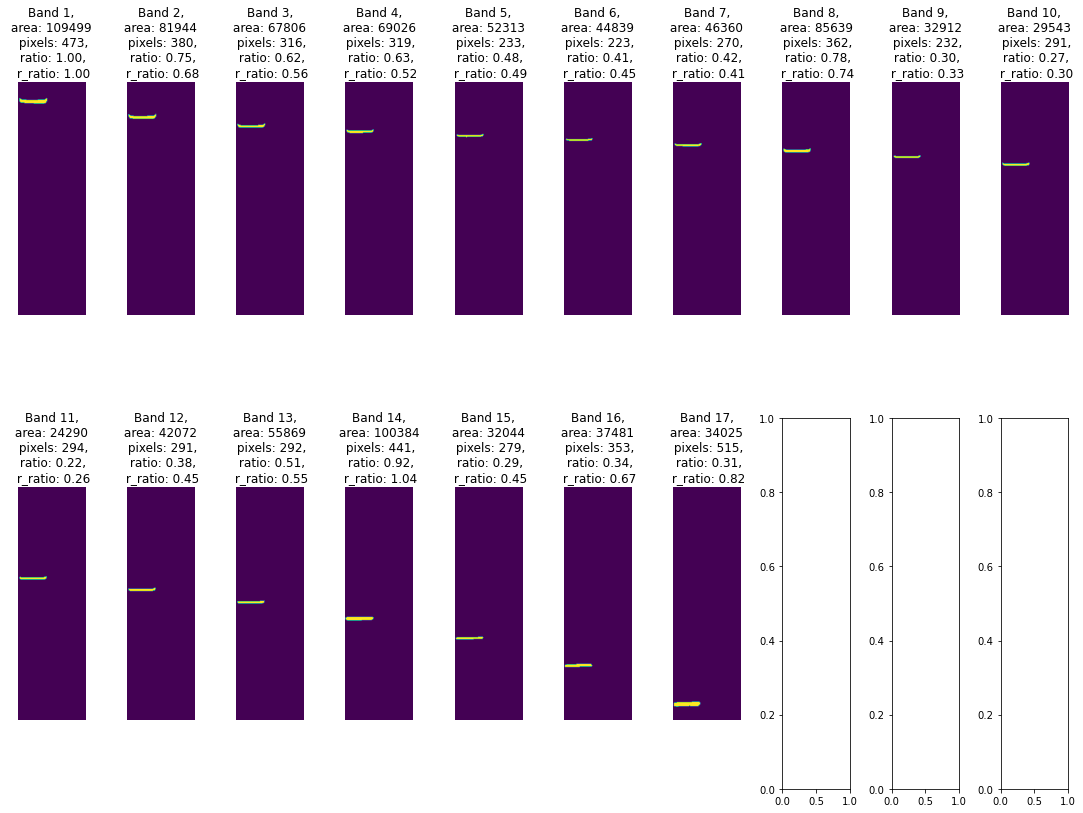

In [130]:
image_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Images/50bp_DNAladder.png'
mask_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/neb_ladders/Masks/50bp_DNAladder.tif'

im = np.array(Image.open(image_file).convert('L'))
mask = np.array(Image.open(mask_file))
labelled_bands, _ = ndi.label(mask)

fig,ax = plt.subplots(2,10,figsize=(15,12))

ref_val = 0
combined_all = []
pixel_all = []
real = [103, 70, 58, 54, 50, 46, 42, 76, 34, 31, 27, 46, 57, 107, 46, 69, 84]

for index, sel_val in enumerate(np.unique(labelled_bands)):
    if sel_val == 0:
        continue
        
    pixel_intensities = np.sum(im[labelled_bands==sel_val])
    pixel_count =  len(im[labelled_bands==sel_val])
    combined = pixel_intensities / pixel_count  
    combined_all.append(combined)
    pixel_all.append(pixel_intensities)
    if sel_val == 1:
        ref_val = pixel_intensities
        
    id_text = 'Band %s,\n area: %s \n pixels: %s,\n ratio: %.2f,\n r_ratio: %.2f' % (sel_val, pixel_intensities, pixel_count, pixel_intensities/ref_val, real[index-1]/real[0]) 
    
    new_im = np.zeros((mask.shape))
    new_im[labelled_bands==sel_val] = sel_val
    
    if sel_val > 10:
        col = 1
        sel_val -= 11
    else:
        sel_val -= 1
        col = 0

    ax[col,sel_val].imshow(new_im)
    ax[col,sel_val].axis('off')
    ax[col,sel_val].set_title(id_text)
    
plt.tight_layout()


pos = pixel_all[0]
norm_pixel = [x/pos for x in pixel_all]

pos = combined_all[0]
norm_combined = [x/pos for x in combined_all]

pos = real[0]
norm_real = [x/pos for x in real]


gelanalyzer = [1829, 1322, 1158, 1110, 977, 725, 606, 1253, 457, 361, 277, 632, 888, 1522, 540, 661, 570]
pos = gelanalyzer[0]
norm_gz = [x/pos for x in gelanalyzer]


Pixel R2: 0.621
Com R2: 0.176
Gelanalyzer R2: 0.645


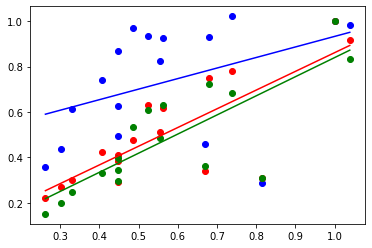

In [124]:
error_com = [np.abs(y-x) for x,y in zip(norm_real, norm_combined)]
error_pixel = [np.abs(y-x) for x,y in zip(norm_real, norm_pixel)]
error_gz = [np.abs(y-x) for x,y in zip(norm_real, norm_gz)]

plt.scatter(norm_real, norm_combined, color='b')
plt.scatter(norm_real, norm_pixel, color='r')
plt.scatter(norm_real, norm_gz, color='g')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_pixel)
print('Pixel R2: %.3f' % r_value**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_combined)
print('Com R2: %.3f' % r_value**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(norm_real, norm_gz)
print('Gelanalyzer R2: %.3f' % r_value**2)

plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_gz, 1))(np.unique(norm_real)), color='g')
plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_pixel, 1))(np.unique(norm_real)),color='r')
plt.plot(np.unique(norm_real), np.poly1d(np.polyfit(norm_real, norm_combined, 1))(np.unique(norm_real)), color='b')
pass

In [125]:
np.average(error_gz)

0.12105306379639662

In [126]:
np.average(error_pixel)

0.09709615126834698

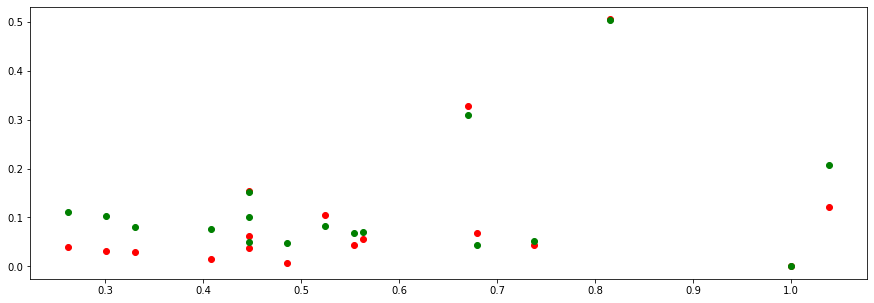

In [135]:
plt.figure(figsize=(15,5))
# plt.scatter(norm_real, error_com, color='b')
plt.scatter(norm_real, error_pixel, color='r')
plt.scatter(norm_real, error_gz, color='g')

In [139]:
import json
  
# Opening JSON file
f = open('/Users/matt/Desktop/adjusted_devs.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
new_list = []
for i in data['RMSF (nm)']:
    if i < 70:
        new_list.append(i)
    else:
        new_list.append(1.0)
        
data['RMSF (nm)'] = new_list

json_object = json.dumps(data, indent=4)

with open('/Users/matt/Desktop/new_devs.json', 'w') as f:
    f.write(json_object)

In [138]:
data

{'RMSF (nm)': [2.242724582688193,
  2.0668948672774694,
  1.9161225213615087,
  1.8107713723370618,
  1.7197816427419101,
  1.6425188902910586,
  1.5690308486146962,
  1.4809844570099235,
  1.4017966162727515,
  1.35803586502319,
  1.2328032133016067,
  1.2565309954405637,
  1.2787894433008018,
  1.3059716093460423,
  1.3484654792613011,
  1.4308219863330862,
  1.5471355767898185,
  1.6827334091987147,
  1.846299196548961,
  2.034304246445752,
  0.9294544015325306,
  0.9495145118140392,
  0.9791849464768763,
  1.0143109580884537,
  1.0641724969220012,
  1.073362744566531,
  1.0796713955968025,
  1.0737897860133379,
  1.0564712595913672,
  1.0299405165060684,
  1.0030321678431673,
  0.9869002721114989,
  0.9987937973690073,
  1.024172497766933,
  1.0598948764779703,
  1.1046580915529944,
  1.1507125850583413,
  1.1905713212616305,
  1.3576439100714743,
  1.4069052043217978,
  1.4697397307447182,
  1.5223132290594212,
  1.5513155309593025,
  1.5430875590535293,
  1.5038096015285363,
  0.